In [1]:
import matplotlib.pyplot as plt
from skimage import io, util, color, feature, draw
import numpy as np
import cv2
from matplotlib import colors

#1 Image Histogram

###1a Method Predict

In [2]:
emerald = [util.img_as_ubyte(io.imread(f"histogram/emerald{i}.jpg")) for i in range(1, 5)]
ruby = [util.img_as_ubyte(io.imread(f"histogram/ruby{i}.jpg")) for i in range(1, 5)]

In [3]:
def predict(file_name):
    img = util.img_as_ubyte(cv2.cvtColor(cv2.imread(file_name), cv2.COLOR_BGR2RGB))
    r, g, b = cv2.split(img)
    red_channel = util.img_as_ubyte(r.flatten())
    
    frequency_count = np.bincount(red_channel.flatten())
    
    return 'emerald' if frequency_count[0] > 0 else 'ruby'

In [4]:
emerald_files = [f"emerald{i}.jpg" for i in range(1, 5)]
ruby_files = [f"ruby{i}.jpg" for i in range(1, 5)]

for filename, pred in list(zip(emerald_files+ruby_files, [predict(image) for image in emerald_files+ruby_files])):
    print(f'{filename} diklasifikasi sebagai {pred}')

emerald1.jpg diklasifikasi sebagai emerald
emerald2.jpg diklasifikasi sebagai emerald
emerald3.jpg diklasifikasi sebagai emerald
emerald4.jpg diklasifikasi sebagai emerald
ruby1.jpg diklasifikasi sebagai ruby
ruby2.jpg diklasifikasi sebagai ruby
ruby3.jpg diklasifikasi sebagai ruby
ruby4.jpg diklasifikasi sebagai ruby


###1b Jelaskan fitur yang telah Anda buat pada bagian a dan alasan Anda memilih fitur tersebut.


>Fitur yang digunakan pada poin a merupakan *frequency count* pada histogram intensitas dari *red channel*. Fitur red channel ini cukup baik digunakan untuk membedakan antara emerald dengan ruby karena keduanya memiliki perbedaan intensitas yang mencolok pada channel *red*. Emerald pasti akan lebih banyak mengandung nilai 0 pada histogram intensitas channel red.

#2 Hough Transform

###2a Gunakan hasil hough transformation yang telah didapatkan sebagai fitur untuk mengklasifikasikan apakah citra tersebut merupakan triangle atau square.


In [5]:
triangles = [f"Hough/triangle{i}.jpg" for i in range(1, 5)]
squares = [f"Hough/square{i}.jpg" for i in range(1, 5)]

#Ref: https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html
def hough_transform(img):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.Canny(gray.astype(np.uint8), 50, 150)
    return edges, [[rho, np.degrees(theta)] for [[rho, theta]] in cv2.HoughLines(edges, 1, np.pi/180, 200)]
res = list(zip(triangles+squares, [hough_transform(io.imread(im)) for im in triangles+squares]))

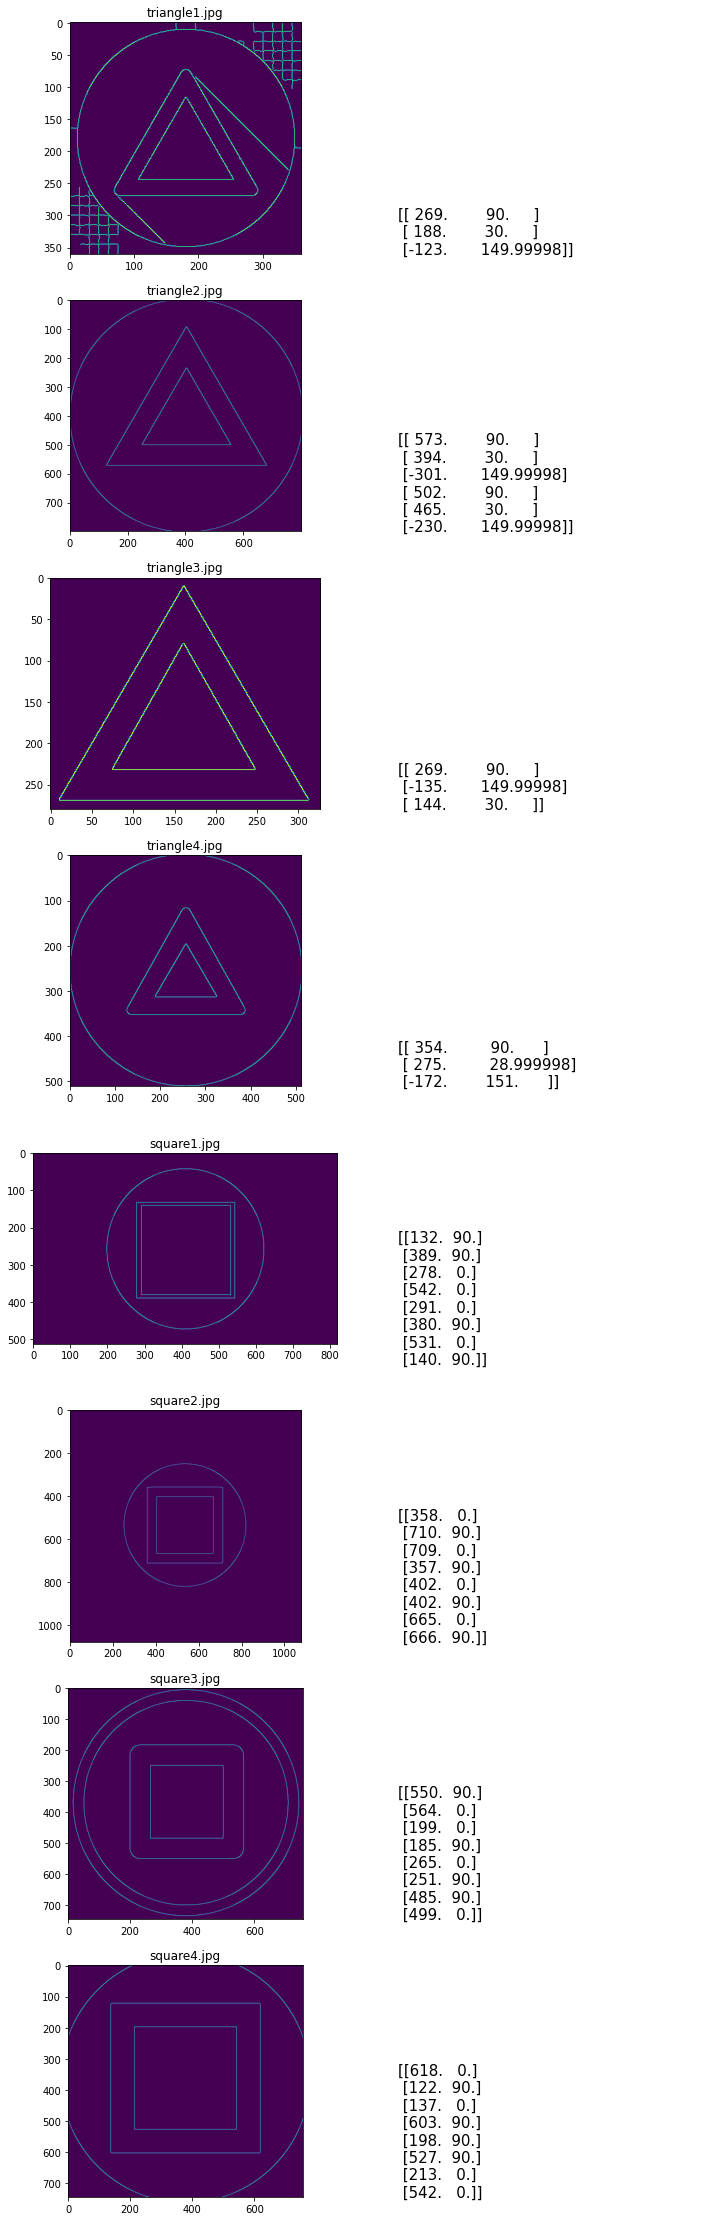

In [6]:
_, axs = plt.subplots(8,2, figsize=(12, 40))
for (name, (edges, lines)), ax in zip(res, axs):
    ax[0].imshow(edges)
    ax[0].set_title(name)
    ax[1].text(0,0,str(np.array(lines)), {'size': 15})
    ax[1].axis('off')
plt.show()

In [7]:
def classify_triangle(file_name):
    classes = {
        # Himpunan sudut dari hough transform sebagaimana ditunjukkan pada visualisasi diatas
        frozenset([90, 150, 30]): 'triangle',
        frozenset([90, 29, 151]): 'triangle',
        frozenset([0, 90]): 'square'
    }
    _, lines = hough_transform(io.imread(file_name))
    angles = {np.round(theta) for rho, theta in lines}
    return classes[frozenset(angles)]

for filename, kelas in list(zip(triangles+squares,
                                [classify_triangle(triangle) for triangle in triangles+squares])):
    print(f"{filename} diprediksi sebagai {kelas}")

triangle1.jpg diprediksi sebagai triangle
triangle2.jpg diprediksi sebagai triangle
triangle3.jpg diprediksi sebagai triangle
triangle4.jpg diprediksi sebagai triangle
square1.jpg diprediksi sebagai square
square2.jpg diprediksi sebagai square
square3.jpg diprediksi sebagai square
square4.jpg diprediksi sebagai square


###2b  Jelaskan fitur yang telah Anda buat pada bagian a dan alasan Anda memilih fitur tersebut.

#3 Template Matching

###3a Lakukan dan tampilkan hasil template matching dengan berbagai threshold pada kedua gambar

In [71]:
import cv2
import numpy as np
 
def match_template(file_name, template_name, threshold=0.7):
    # Read the main image
  img_rgb = cv2.imread(file_name)
  
  # Convert it to grayscale
  img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
  
  # Read the template
  template = cv2.imread(template_name, 0)
  
  # Store width and height of template in w and h
  w, h = template.shape[::-1]
  
  # Perform match operations.
  res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)
  

  # Store the coordinates of matched area in a numpy array
  loc = np.where(res >= threshold)
  
  # Draw a rectangle around the matched region.
  for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)

  plt.figure(figsize=(10,5))
  plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))
 

In [ ]:
match_template('Template Matching/dunk.jpg', 'Template Matching/ball.jpg')

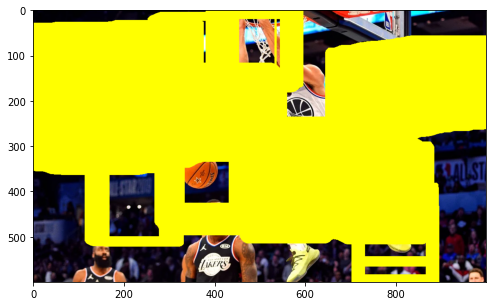

In [73]:
match_template('Template Matching/dunk.jpg', 'Template Matching/ball.jpg', threshold=0.25)

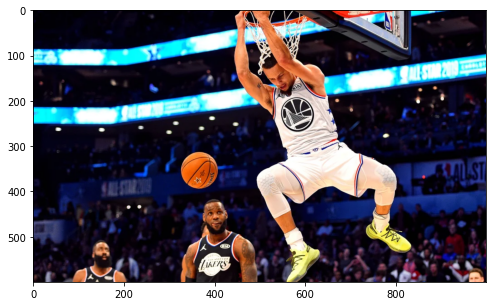

In [74]:
match_template('Template Matching/dunk.jpg', 'Template Matching/ball.jpg', threshold=0.5)

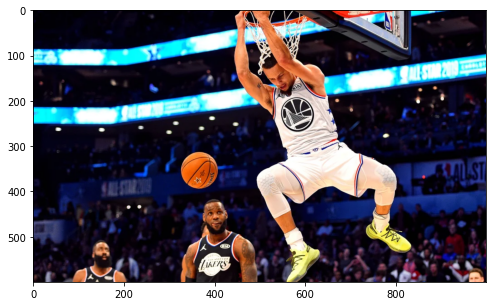

In [75]:
match_template('Template Matching/dunk.jpg', 'Template Matching/ball.jpg', threshold=1)

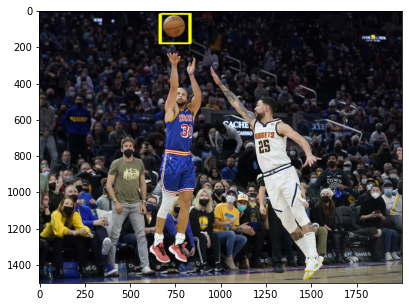

In [76]:
match_template('Template Matching/3-pointer.jpg', 'Template Matching/ball.jpg')

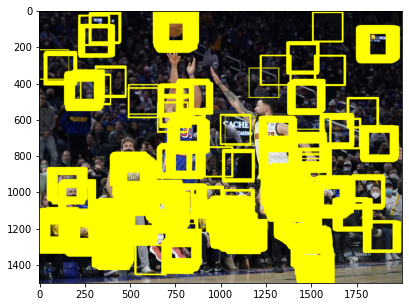

In [77]:
match_template('Template Matching/3-pointer.jpg', 'Template Matching/ball.jpg', threshold=0.25)

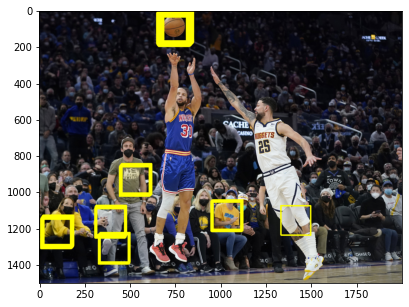

In [78]:
match_template('Template Matching/3-pointer.jpg', 'Template Matching/ball.jpg', threshold=0.5)

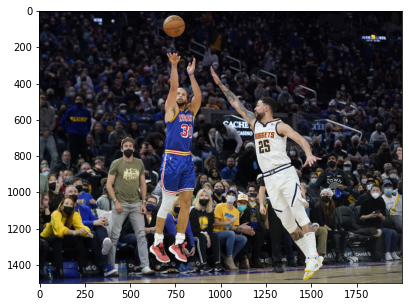

In [79]:
match_template('Template Matching/3-pointer.jpg', 'Template Matching/ball.jpg', threshold=1)

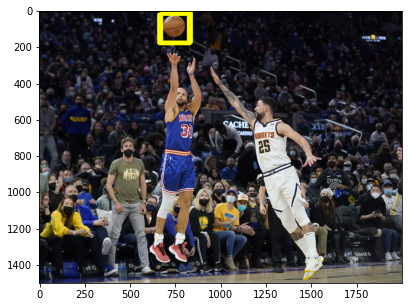

In [80]:
match_template('Template Matching/3-pointer.jpg', 'Template Matching/ball.jpg', threshold=0.6)

###3b Terdapat perbedaan performa untuk beberapa threshold berbeda. Untuk gambar 3-pointer threshold 0.7 dan 0.6 menujukkan hasil yang cukup baik. Sedangkan untuk gambar dunk.jpg nampaknya cv2 tidak berhasil sama sekali melakukan template matching untuk keempat nilai threshold yang telah diberikan.

###3c Metode ini tidak cukup baik untuk melakukan template matching dalam kasus ini. Hal ini dapat dilihat berdasarkan hasil yang telah didapatkan diatas, cv2 kesulitan memberikan hasil yang baik ketika citra bola yang dijadikan template tidak sama persis dengan citra bola yang ada pada gambar yang akan dilakukan template matching.